# 项目目的
- 复习爬虫、试验微博爬虫；
- 获得、监测明星微博数据，发现有趣的点。

In [1]:
# load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

import os
import time
import datetime
import glob

import requests
from bs4 import BeautifulSoup
import json


## 爬虫框架

### 获取网页源代码
- 网页版
    - 不能直接requests
    - 尝试session, FAIL(不会解析json);

- 尝试手机版
    - requests失败
    - session，添加headers里找到的cookie，成功

- 不到万不得已不想用selenium乌乌

### 提取有用部分
- 用户信息
    - 名称，基本信息，简介
    - 粉丝数，关注
    - 微博数量，maxpage
    
- 微博内容(span, class = 'ctt')，对应数据:
    - 内容
    - 时间
    - 形式（微博内容中有无视频div展示的方式不一样）
    - 转
    - 赞
    - 评(class = cc)

### 循环for 1 user set pages

### 循环for assigned users set pages

## Try for 1 user

In [2]:
url = 'https://weibo.cn/u/5029399338'

In [3]:
headers = {
   # pretend I am a browser
   'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1',
   'cookie': '_T_WM=34953442506; SCF=Ajk-YV78pP2M6RQSDe4wfly_80RM9Q-4QymuM7cR3PdtCVC_zNKISHgzwvdCHM_kaiOGv3aTY_4BOv21hRAMiq0.; SUB=_2A25yj94CDeRhGeBP71QX-CbKzz6IHXVuc-JKrDV6PUJbktANLUL6kW1NRUxjc1DvrIOejhkvv8vmZCt1pSz-euBg; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WhsbQaHX4CfzZMfTWwKPfgk5NHD95QceKBcSonRSoBEWs4Dqcj.i--Xi-z4iKL2i--ciKLhiKL2i--Xi-zRiKn7i--fiKn4iK.p; SUHB=0bt8gOFsGDjHnO; SSOLoginState=1602989650; WEIBOCN_FROM=1110103030; MLOGIN=1; M_WEIBOCN_PARAMS=luicode%3D10000011%26lfid%3D1076035029399338%26fid%3D1005055029399338%26uicode%3D10000011; XSRF-TOKEN=98e6c5'
   }
session = requests.Session()
page = session.get(url, headers = headers)
soup = BeautifulSoup(page.text)

In [37]:
# weibo用户基本信息
info = soup.find('span', {'class': 'ctt'})
user_name = info.img.parent.get_text().strip(info.span.string).split('\xa0')[0]
basic = ''.join((info.img.parent.get_text().strip(info.span.string).split('\xa0')[1]).split())

In [143]:
tip2 = soup.find('div', class_ = 'tip2')
weibo_num, follow, follower = re.findall('[0-9]+', tip2.text)[:3]

In [128]:
mpage = int(soup.find('input', {'name': 'mp'})['value'])
mpage

212

In [ ]:
# 需要创建一个range(0, mp)的url_list，遍历

In [38]:
# 发博信息：内容，形式，转赞评
# 一条微博为1个card，默认显示前10个card
cards = soup.find_all('div', {'class': 'c', 'id': not None})

In [151]:
cards

[<div class="c" id="M_JeFZY4ao5"><div><span class="ctt">曾经很有自信... 😅‬ <a href="https://m.weibo.cn/s/video/show?object_id=1034:4534980294934534&amp;fromWap=1">Yesung110684的微博视频</a> </span> <a href="https://weibo.cn/attitude/JeFZY4ao5/add?uid=6146688642&amp;rl=0&amp;st=690cae">赞[16981]</a> <a href="https://weibo.cn/repost/JeFZY4ao5?uid=5029399338&amp;rl=0">转发[1618]</a> <a class="cc" href="https://weibo.cn/comment/JeFZY4ao5?uid=5029399338&amp;rl=0#cmtfrm">评论[10209]</a> <a href="https://weibo.cn/fav/addFav/JeFZY4ao5?rl=0&amp;st=690cae">收藏</a><!-- --> <span class="ct">08月06日 17:44 来自iPhone 11 Pro</span></div></div>,
 <div class="c" id="M_JeDpi3c1g"><div><span class="ctt">人累不要紧，只要心不累就好办。 </span> [<a href="https://weibo.cn/mblog/picAll/JeDpi3c1g?rl=1">组图共2张</a>]</div><div><a href="https://weibo.cn/mblog/pic/JeDpi3c1g?rl=0"><img alt="图片" class="ib" src="http://wx1.sinaimg.cn/wap180/005umQwagy1ghgwyy89hfj31kw2dc1ky.jpg"/></a> <a href="https://weibo.cn/mblog/oripic?id=JeDpi3c1g&amp;u=005umQwagy1g

In [131]:
# cards[0].div.span.a.text为视频的固定表达，如“Yesung110684的微博视频”
content = [card.div.span.text.split(cards[0].div.span.a.text)[0] for card in cards]
content

['曾经很有自信... 😅\u202c ',
 '人累不要紧，只要心不累就好办。 ',
 '笑吧 笑吧 笑吧 😁 ',
 '如果没有能力改变现状， 我就要控制我自己的情绪。 ',
 '굿밤 🌝 ',
 '吓一跳。🐝🐝🐝 ',
 '🥬🥒🌶🌽🥕 @SUPERJUNIOR ',
 '分身术 🍀 ',
 '예욱한 밤 🌙 #goodnight# ',
 '大家都幸福了吧？🐶🐶 ']

In [189]:
tm = [card.find('span', class_='ct').text.split('\xa0来自')[0] for card in cards]
source = [card.find('span', class_='ct').text.split('\xa0来自')[1] for card in cards]
tm,source

(['08月06日 17:44',
  '08月06日 11:08',
  '08月05日 19:53',
  '08月05日 13:36',
  '08月03日 21:58',
  '08月02日 16:35',
  '08月02日 12:15',
  '07月31日 19:42',
  '07月30日 23:41',
  '07月29日 21:12'],
 ['iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro',
  'iPhone 11 Pro'])

In [76]:
video_col = [card.div.span.find_all('a')[-1].text if (card.div.span.a is not None) else '0' for card in cards]
video = [1 if (re.search('视频', unit) is not None) else 0 for unit in video_col]

In [40]:
video

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [164]:
photo_col = [card.find_all('a')[0] if (re.findall('图',card.find_all('a')[0].text) != [])|(card.find_all('a')[0].find('img') is not None) else 0 for card in cards]
photo_col

[0,
 <a href="https://weibo.cn/mblog/picAll/JeDpi3c1g?rl=1">组图共2张</a>,
 <a href="https://weibo.cn/mblog/picAll/JexqblzQ5?rl=1">组图共4张</a>,
 <a href="https://weibo.cn/mblog/pic/JeuX7yvdr?rl=0"><img alt="图片" class="ib" src="http://wx3.sinaimg.cn/wap180/005umQwagy1ghfvndj2hij30u0190wqt.jpg"/></a>,
 <a href="https://weibo.cn/mblog/picAll/JefnWxpIh?rl=1">组图共3张</a>,
 0,
 0,
 <a href="https://weibo.cn/mblog/pic/JdMcWqZc3?rl=0"><img alt="图片" class="ib" src="http://wx2.sinaimg.cn/wap180/005umQwagy1ghae3z4rc1j31o02yo1ky.jpg"/></a>,
 0,
 <a href="https://weibo.cn/mblog/picAll/JdtWOp8HC?rl=1">组图共3张</a>]

In [165]:
photo_col

[0,
 <a href="https://weibo.cn/mblog/picAll/JeDpi3c1g?rl=1">组图共2张</a>,
 <a href="https://weibo.cn/mblog/picAll/JexqblzQ5?rl=1">组图共4张</a>,
 <a href="https://weibo.cn/mblog/pic/JeuX7yvdr?rl=0"><img alt="图片" class="ib" src="http://wx3.sinaimg.cn/wap180/005umQwagy1ghfvndj2hij30u0190wqt.jpg"/></a>,
 <a href="https://weibo.cn/mblog/picAll/JefnWxpIh?rl=1">组图共3张</a>,
 0,
 0,
 <a href="https://weibo.cn/mblog/pic/JdMcWqZc3?rl=0"><img alt="图片" class="ib" src="http://wx2.sinaimg.cn/wap180/005umQwagy1ghae3z4rc1j31o02yo1ky.jpg"/></a>,
 0,
 <a href="https://weibo.cn/mblog/picAll/JdtWOp8HC?rl=1">组图共3张</a>]

In [167]:
photo = []
for this_photo in photo_col:
    if type(this_photo) == int:
        photo.append('0')
    else: 
        if re.findall('图',this_photo.text) != []:
            photo.append(re.findall('[0-9]+', this_photo.text)[0])
        else:
            photo.append('1')

In [168]:
photo

['0', '2', '4', '1', '3', '0', '0', '1', '0', '3']

In [169]:
photo = [*map(lambda x: int(x), photo)]

In [170]:
photo

[0, 2, 4, 1, 3, 0, 0, 1, 0, 3]

In [109]:
attitude_reg = re.compile(r'^https://weibo.cn/attitude/')
repost_reg = re.compile(r'^https://weibo.cn/repost/')
cc_reg = re.compile(r'^https://weibo.cn/comment/')

In [123]:
zans = [card.find_all('a', href = attitude_reg)[0] for card in cards]
zan_nums = [int(re.findall('[0-9]+',zan.text)[0]) for zan in zans]

repos = [card.find_all('a', href = repost_reg)[0] for card in cards]
repo_nums = [int(re.findall('[0-9]+',repo.text)[0]) for repo in repos]

ccs = [card.find_all('a', href = cc_reg)[0] for card in cards]
cc_nums = [int(re.findall('[0-9]+', cc.text)[0]) for cc in ccs]

In [132]:
page_dict = {
    'content': content,
    'time': tm,
    'source': source,
    'video': video,
    'photo': photo,
    'zan': zan_nums,
    'repo': repo_nums,
    'cc': cc_nums
}

In [133]:
pd.DataFrame(page_dict)

,content,time,source,video,photo,zan,repo,cc
0,曾经很有自信... 😅‬,08月06日 17:44,iPhone 11 Pro,1,0,16988,1618,10243
1,人累不要紧，只要心不累就好办。,08月06日 11:08,iPhone 11 Pro,0,2,18497,2327,2657
2,笑吧 笑吧 笑吧 😁,08月05日 19:53,iPhone 11 Pro,0,4,17959,1790,2337
3,如果没有能力改变现状， 我就要控制我自己的情绪。,08月05日 13:36,iPhone 11 Pro,0,1,18117,1717,1727
4,굿밤 🌝,08月03日 21:58,iPhone 11 Pro,0,3,14195,1470,1766
5,吓一跳。🐝🐝🐝,08月02日 16:35,iPhone 11 Pro,1,0,16438,1652,1606
6,🥬🥒🌶🌽🥕 @SUPERJUNIOR,08月02日 12:15,iPhone 11 Pro,0,0,15678,2040,1693
7,分身术 🍀,07月31日 19:42,iPhone 11 Pro,0,1,12881,1106,1508
8,예욱한 밤 🌙 #goodnight#,07月30日 23:41,iPhone 11 Pro,0,0,13150,1094,1262
9,大家都幸福了吧？🐶🐶,07月29日 21:12,iPhone 11 Pro,0,3,11875,1034,1501


## 循环for 1 user set pages

### 存储1个用户的指定weibo页面

In [3]:
def store_user_pages(user_name, user_url, maxp, minp = 1):
    '''
    Reads the user's assigned pages of weibo
    Input: 
    - user's name(str) used as file name, 
    - user's whichever-page url (str), 
    - the range of pages you want to grab: minp(int), maxp(str)
    Output: all the weibo pages stored in folder created at the time the function is requested
    '''
    # get the url_list
    clean_url = re.sub(r'\?.+?=.+?', '', user_url)
    url_list = [clean_url + '?page=' + str(page) for page in range(minp, maxp+1)]
    
    # set request session
    headers = {
    # pretend I am a browser
   'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1',
   'cookie': '_T_WM=34953442506; SCF=Ajk-YV78pP2M6RQSDe4wfly_80RM9Q-4QymuM7cR3PdtCVC_zNKISHgzwvdCHM_kaiOGv3aTY_4BOv21hRAMiq0.; SUB=_2A25yj94CDeRhGeBP71QX-CbKzz6IHXVuc-JKrDV6PUJbktANLUL6kW1NRUxjc1DvrIOejhkvv8vmZCt1pSz-euBg; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WhsbQaHX4CfzZMfTWwKPfgk5NHD95QceKBcSonRSoBEWs4Dqcj.i--Xi-z4iKL2i--ciKLhiKL2i--Xi-zRiKn7i--fiKn4iK.p; SUHB=0bt8gOFsGDjHnO; SSOLoginState=1602989650; WEIBOCN_FROM=1110103030; MLOGIN=1; M_WEIBOCN_PARAMS=luicode%3D10000011%26lfid%3D1076035029399338%26fid%3D1005055029399338%26uicode%3D10000011; XSRF-TOKEN=98e6c5'
   }
    session = requests.Session()
    
    # set folder and file_name(file_name = 'username page_num.html')
    zfill_n = len(str(maxp - minp))
    folder_name = user_name + ' ' + str(datetime.datetime.now().strftime('%Y-%m-%d %H_%M'))
    folder_path = os.getcwd()+'\\'+ user_name + '\\' + folder_name
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # save all the weibo pages in this folder
    for url in url_list:
        page = session.get(url, headers = headers)
        soup = BeautifulSoup(page.text)
        file_name = user_name + ' ' + str(minp).zfill(zfill_n) + '.html'
        name_wdir = os.path.join(folder_path, file_name)
        with open(name_wdir, "w", encoding='utf-8') as f:
            f.write(str(soup))
        
        time.sleep(np.random.randint(1,2) + np.random.random())
        minp += 1

### 选择要提取的weibo

获得所有folder

In [4]:
def get_folders(user):
    '''
    Get list folders that contain weibos
    '''
    all_items = os.listdir(os.getcwd()+ f'\\{user}')
    folder_bool = [True if (re.match(f'^{user}', file) is not None) & (re.match(r'.+?\.html$', file) is None) else False for file in all_items]
    folder_list = []
    for idx in range(len(all_items)):
        if folder_bool[idx] == True:
            folder_list.append(all_items[idx])
    return folder_list

读取该user指定folder里的基本信息和所有weibo

In [20]:
def get_basic_info(user, folder_idx):
    
    file = glob.glob(f'{user}'+ '\\'+ get_folders(user)[folder_idx] + '\\*.html')[0]
    page = open(file, "r", encoding="utf-8").read()
    soup = BeautifulSoup(page)
    
    info = soup.find('span', {'class': 'ctt'})
    user_alias = info.img.parent.get_text().strip(info.span.string).split('\xa0')[0]
    basic = ''.join((info.img.parent.get_text().strip(info.span.string).split('\xa0')[1]).split())
    renzheng = soup.find('div', class_ = 'u').find_all('span', class_ = 'ctt')[1].text
    descrp = soup.find('div', class_ = 'u').find_all('span', class_ = 'ctt')[2].text
    
    tip2 = soup.find('div', class_ = 'tip2')
    weibo_num, follow, follower = re.findall('[0-9]+', tip2.text)[:3]
    
    maxpage = int(soup.find('input', {'name': 'mp'})['value'])
    basic_dict = dict({'user_alias':user_alias,
                        'basic': basic,
                        'certify': renzheng,
                        'desciption': descrp,
                        'weibo_cnt':weibo_num,
                        'follow':follow,
                        'follower':follower,
                        'maxpage': maxpage})
    return basic_dict

In [6]:
def read_user(user, folder_idx):
    '''
    Reads the user's assigned pages of weibo
    Input: user's url - htm, the number of first pages you want to grab 
    Output: dataframe for all the weibos
    
    '''
    weibo_df = pd.DataFrame()
    file_list = glob.glob(f'{user}'+ '\\'+ get_folders(user)[folder_idx] + '\\*.html')
    for file_name in file_list:
        page = open(file_name, "r", encoding="utf-8").read()
        soup = BeautifulSoup(page)
        cards = get_cards(soup)
        weibo_df = weibo_df.append(read_card(cards)).reset_index(drop = True)
        
    return weibo_df       

从一页weibo上获得所有weibo卡片

In [7]:
def get_cards(soup):
    cards = soup.find_all('div', {'class': 'c', 'id': not None})
    return cards

读取weibo卡片内容

In [31]:
def read_card(cards):
    '''
    This function can read the weibo contents, release time, source, media, and responses on 1 page
    Input: cards(all the divs on 1 weibo page)
    Output: a dataframe
    
    '''
    card_dict = dict(card_info(basic_info['user_alias'], cards), **card_media(cards), **card_zzp(cards))
    return pd.DataFrame(card_dict)

In [32]:
def card_info(user_alias, cards):
    
    video_text = user_alias + '的微博视频'
    
    content = [card.div.span.text.split(video_text)[0] if card.div.span.text is not None else None for card in cards]
    tm = [card.find('span', class_='ct').text.split('\xa0来自')[0] for card in cards]
    source = [card.find('span', class_='ct').text.split('\xa0来自')[1] for card in cards]
    return dict({
        'content': content,
        'time': tm,
        'source': source
    })

In [10]:
def card_media(cards):
    video_col = [card.div.span.find_all('a')[-1].text if (card.div.span.a is not None) else '0' for card in cards]
    video = [1 if (re.search('视频', unit) is not None) else 0 for unit in video_col]
    
    photo_col = [card.find_all('a')[0] if (re.findall('图',card.find_all('a')[0].text) != [])|(card.find_all('a')[0].find('img') is not None) else 0 for card in cards]
    photo = []
    for this_photo in photo_col:
        if type(this_photo) == int:
            photo.append('0')
        else: 
            if re.findall('图',this_photo.text) != []:
                photo.append(re.findall('[0-9]+', this_photo.text)[0])
            else:
                photo.append('1')
    photo = [*map(lambda x: int(x), photo)]
    
    return dict({
        'video': video,
        'photo': photo
    })  

In [35]:
attitude_reg = re.compile(r'^https://weibo.cn/attitude/')
repost_reg = re.compile(r'^https://weibo.cn/repost/')
cc_reg = re.compile(r'^https://weibo.cn/comment/')

def card_zzp(cards):

    zans = [card.find_all('a', href = attitude_reg)[0] for card in cards]
    zan_nums = [int(re.findall('[0-9]+',zan.text)[0]) for zan in zans]

    repos = [card.find_all('a', href = repost_reg)[0] for card in cards]
    repo_nums = [int(re.findall('[0-9]+',repo.text)[0]) for repo in repos]

    ccs = [card.find_all('a', href = cc_reg)[0] for card in cards]
    cc_nums = [int(re.findall('[0-9]+', cc.text)[0]) for cc in ccs]

    return dict({
        'zan': zan_nums,
        'repo': repo_nums,
        'cc': cc_nums
    })  

### 演示：爬取艺声的所有微博

In [12]:
user = 'yesung'
user_url = 'https://weibo.cn/u/5029399338'
maxp = 212

In [386]:
if not os.path.exists(os.getcwd() + f'\\{user}'):
    os.makedirs(os.getcwd() + f'\\{user}')

In [387]:
# 存储所有weibo到文件夹内
store_user_pages(user, user_url, maxp = maxp)

In [13]:
# 目前该user的文件夹内有哪些时段的weibo状态呢？
get_folders(user)

['yesung 2020-10-19 22_22']

In [21]:
# 从选中的文件夹内获得用户basic info
folder_idx = 0 #选中第1个文件夹 
basic_info = get_basic_info(user, folder_idx)
basic_info

{'user_alias': 'Yesung110684',
 'basic': '男/海外',
 'certify': '认证：韩国歌手，Super Junior组合成员艺声',
 'desciption': '',
 'weibo_cnt': '2115',
 'follow': '11',
 'follower': '2582789',
 'maxpage': 212}

In [172]:
file_location = os.getcwd()+ f'\\{user}' + f'\\{get_folders(user)[folder_idx]}'

class JsonEncoder(json.JSONEncoder):

    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, datetime):                                 
            return obj.__str__()
        else:
            return super(MyEncoder, self).default(obj)
        
with open(file_location+'\\basic_info.txt', "w", encoding='utf-8') as f:
            json.dump(basic_info, f, ensure_ascii=False, cls=JsonEncoder)

In [36]:
yesung_weibo = read_user(user, folder_idx)

In [37]:
yesung_weibo

,content,time,source,video,photo,zan,repo,cc
0,曾经很有自信... 😅‬,08月06日 17:44,iPhone 11 Pro,1.0,0.0,17003.0,1619.0,10282.0
1,人累不要紧，只要心不累就好办。,08月06日 11:08,iPhone 11 Pro,0.0,2.0,18508.0,2327.0,2658.0
2,笑吧 笑吧 笑吧 😁,08月05日 19:53,iPhone 11 Pro,0.0,4.0,17966.0,1790.0,2338.0
3,如果没有能力改变现状， 我就要控制我自己的情绪。,08月05日 13:36,iPhone 11 Pro,0.0,1.0,18124.0,1718.0,1728.0
4,굿밤 🌝,08月03日 21:58,iPhone 11 Pro,0.0,3.0,14198.0,1470.0,1767.0
...,...,...,...,...,...,...,...,...
2081,Luhan & Yesung ^^,2014-05-28 19:47:38,iPhone客户端,0.0,2.0,47312.0,13796.0,7636.0
2082,왕솜사탕 ~~ 그라고 예성잉 ^^,2014-05-03 20:00:30,iPhone客户端,0.0,4.0,15306.0,8023.0,5646.0
2083,내욕심이많았다 MV http://t.cn/8FHCwp3 일본어버젼 http://t....,2014-02-19 21:31:44,iPhone客户端,0.0,0.0,12963.0,5591.0,4379.0
2084,做个好梦，我们在梦中相见。,2014-02-09 22:38:28,iPhone客户端,0.0,1.0,23639.0,14937.0,13618.0


__Congratulations! 得到了一个脏脏的数据集！__

### 数据清洗

In [38]:
yesung_weibo.sample(3)

,content,time,source,video,photo,zan,repo,cc
673,완전 굿🕺🏻💃🏻 #푸에르자부르타##은혁#,2019-07-18 21:23:34,iPhone X,0.0,0.0,10835.0,1314.0,924.0
839,Let's go !! 🐾🐾🐾,2019-03-26 20:12:54,iPhone X,0.0,7.0,10983.0,1348.0,1146.0
2060,早安。,2015-01-03 08:05:35,iPhone 6,0.0,3.0,19654.0,4032.0,3250.0


In [42]:
yesung_weibo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 8 columns):
content    2086 non-null object
time       2086 non-null object
source     2086 non-null object
video      2086 non-null float64
photo      2086 non-null float64
zan        2086 non-null float64
repo       2086 non-null float64
cc         2086 non-null float64
dtypes: float64(5), object(3)
memory usage: 130.5+ KB


to-do list
- time -> datetime
- video, photo, zan, repo, cc -> int
- add cols that count tags?

In [44]:
# time->datetime 

yw = yesung_weibo.copy()
yw.time.sample(10)

303            02月13日 15:14
367            01月09日 18:00
1702    2016-10-07 21:21:41
2018    2015-07-03 01:54:46
177            04月26日 06:26
115            06月01日 01:54
1390    2017-09-06 08:15:54
227            03月21日 12:49
116            05月31日 23:11
385            01月02日 14:24
Name: time, dtype: object

In [47]:
yw.time[390] #非当年的年份以标准方式表示，同年微博以中文月日时表示

'2019-12-31 22:11:15'

In [90]:
def change_time_format(release_time):
    if release_time.find('日') != -1:
        release_time = str(datetime.datetime.now().year) + '年' + release_time
        release_time = datetime.datetime.strptime(release_time, '%Y年%m月%d日 %H:%M')
    return release_time

In [165]:
yw.time = yw.time.apply(change_time_format)

In [96]:
# 原浮点小数转存为int
yw[yw.columns[-5:]] = yw[yw.columns[-5:]].astype(int)

In [97]:
yw.sample(5)

,content,time,source,video,photo,zan,repo,cc
1249,‪MAPS vol.118 is out NOW ‼️ At all over the bo...,2018-02-21 18:39:48,iPhone X,0,0,9849,835,683
1595,그래도 .. 따뜻해서 좋았어 🚓 #보이스 #삐뽀삐뽀,2017-02-19 12:04:00,iPhone 6,0,0,5168,437,303
826,大家都好好睡吧 💋💋💋,2019-04-10 23:02:15,iPhone X,0,7,11139,1201,1552
528,쪼쪼미 ✌🏻,2019-10-18 13:05:55,iPhone X,0,1,20061,1363,1233
861,도쿄는 봄 콘서트 🌸🌸🌸,2019-03-13 14:22:45,微博视频,1,0,8234,825,829


In [155]:
# get number of topics
topic = yw.content.apply(lambda x: len([*re.finditer(r'\#[0-9\w]', x)]))
yw.insert(1, 'topic', value = topic)

In [175]:
file_location = os.getcwd()+ f'\\{user}' + f'\\{get_folders(user)[folder_idx]}'
yw.to_excel(file_location + f'\\{get_folders(user)[folder_idx]} weibo status.xlsx')

In [166]:
yw

,content,topic,time,source,video,photo,zan,repo,cc
0,曾经很有自信... 😅‬,0,2020-08-06 17:44:00,iPhone 11 Pro,1,0,17003,1619,10282
1,人累不要紧，只要心不累就好办。,0,2020-08-06 11:08:00,iPhone 11 Pro,0,2,18508,2327,2658
2,笑吧 笑吧 笑吧 😁,0,2020-08-05 19:53:00,iPhone 11 Pro,0,4,17966,1790,2338
3,如果没有能力改变现状， 我就要控制我自己的情绪。,0,2020-08-05 13:36:00,iPhone 11 Pro,0,1,18124,1718,1728
4,굿밤 🌝,0,2020-08-03 21:58:00,iPhone 11 Pro,0,3,14198,1470,1767
...,...,...,...,...,...,...,...,...,...
2081,Luhan & Yesung ^^,0,2014-05-28 19:47:38,iPhone客户端,0,2,47312,13796,7636
2082,왕솜사탕 ~~ 그라고 예성잉 ^^,0,2014-05-03 20:00:30,iPhone客户端,0,4,15306,8023,5646
2083,내욕심이많았다 MV http://t.cn/8FHCwp3 일본어버젼 http://t....,0,2014-02-19 21:31:44,iPhone客户端,0,0,12963,5591,4379
2084,做个好梦，我们在梦中相见。,0,2014-02-09 22:38:28,iPhone客户端,0,1,23639,14937,13618


In [216]:
def get_data_dictionary():
    content_d = 'content: 微博内容\n'
    topic_d = 'topic: 该微博中含有的话题数量\n'
    time_d = 'time: 该微博发出的时间点\n'
    source_d = 'source: 该微博发出的来源，如iPhone客户端\n'
    video_d = 'video: 该微博是否含有视频，1为是，0为否\n'
    photo_d = 'photo: 该微博含有的图片数量\n'
    reaction_d = 'zan, repo, cc: 该微博在爬虫时间点获得的赞、转、评数量'

    data_dict = 'Data Dictionary:\n\n' + content_d + topic_d + time_d + source_d + video_d + photo_d + reaction_d
    
    return data_dict

In [217]:
def clean_dateframe(user_weibo, file_location, file_prefix):
    user_weibo.time = user_weibo.time.apply(change_time_format)
    user_weibo[user_weibo.columns[-5:]] = user_weibo[user_weibo.columns[-5:]].astype(int)
    topic = user_weibo.content.apply(lambda x: len([*re.finditer(r'\#[0-9\w]', x)]))
    user_weibo.insert(1, 'topic', value = topic)
    user_weibo.to_excel(file_location + f'\\{file_prefix} weibo status.xlsx')
    with open(file_location + '\\data dictionary.txt') as f:
        f.write(get_data_dictionary())

## 分析

思路：
- 提及sj member的次数；
- 发博时间点；
- 转赞评的曲线；


In [182]:
yw_t = yw.copy()
yw_t = yw_t.set_index('time')

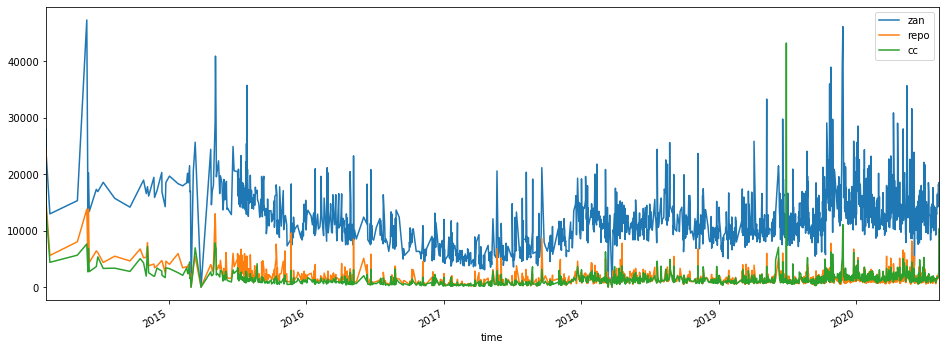

In [186]:
yw_t[['zan', 'repo', 'cc']].plot(figsize = (16,6))

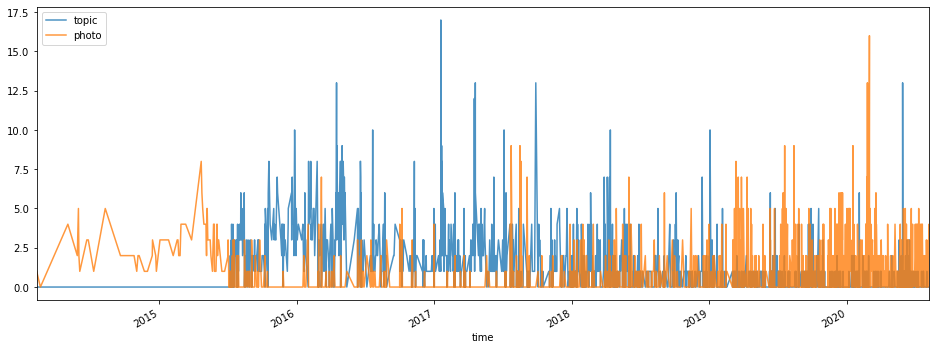

In [198]:
yw_t[['topic', 'photo']].plot(alpha = 0.8,figsize = (16,6))